# **패키지 불러오기**
data 시각화 라이브러리 import 하기

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

시각화 할 데이터 불러오기(From Google Drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
DRIVE_PATH='/content/drive/MyDrive/'
FILE_PATH_IN_MY_DRIVE="part1_user_analysis/project_1_data_analysis/data/event_log.csv"
PATH=DRIVE_PATH+FILE_PATH_IN_MY_DRIVE
print(PATH)
df=pd.read_csv(PATH)
df.head()

/content/drive/MyDrive/part1_user_analysis/project_1_data_analysis/data/event_log.csv


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


시각화할 데이터 가져오기 (일자형 DAU 그래프)

In [4]:
# 날짜 뽑기
df['event_date']=df['event_time'].str.slice(start=0,stop=10)
df['event_date_dtm_formt']=pd.to_datetime(df['event_date'],format="%Y-%m-%d")

# 날짜 별 unique user 수 계산하기
df_2=df.groupby('event_date')['user_id'].nunique()
dau_data=pd.DataFrame({'event_date':df_2.index,'user_count':df_2.values})

In [5]:
dau_data

,event_date,user_count
0,2020-09-24,1358
1,2020-09-25,2451
2,2020-09-26,2030
3,2020-09-27,2187
4,2020-09-28,2732
...,...,...
153,2021-02-24,2904
154,2021-02-25,2784
155,2021-02-26,2960
156,2021-02-27,2578


기본 그래프 그리기

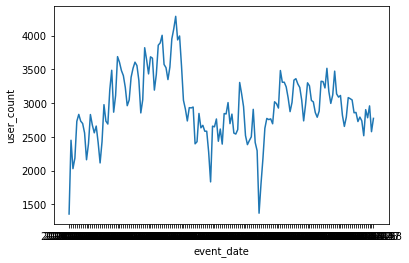

In [6]:
sns.lineplot(x='event_date',y='user_count',data=dau_data)
# 기본 그래프 사용시
# 지저분하다
# 그리드가 없다
# 색상을 바꾸고 싶다
# 데이터 길이에 비해 그래프 크기가 작다
# 기간이 너무 길다

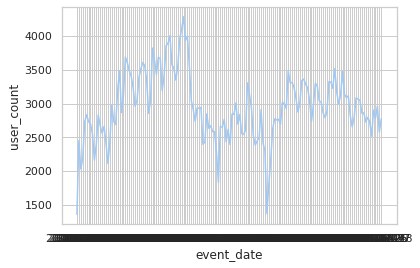

In [7]:
# 테마 및 색상 팔레트 변경
# 테마 종류: https://seaborn.pydata.org/generated/seaborn.set_theme.html
# 색상 팔레트 종류: https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial
sns.set_theme(style="whitegrid",palette="pastel")
g=sns.lineplot(x='event_date',y='user_count',data=dau_data)

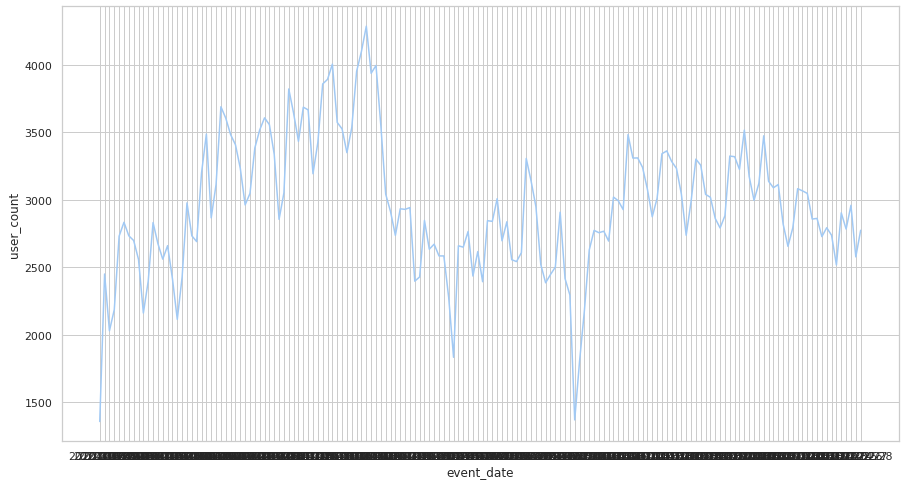

In [8]:
# 그래프 크기 키우기
sns.set_theme(style="whitegrid",palette="pastel")
g=sns.lineplot(x='event_date',y='user_count',data=dau_data)
g.figure.set_size_inches(15,8)

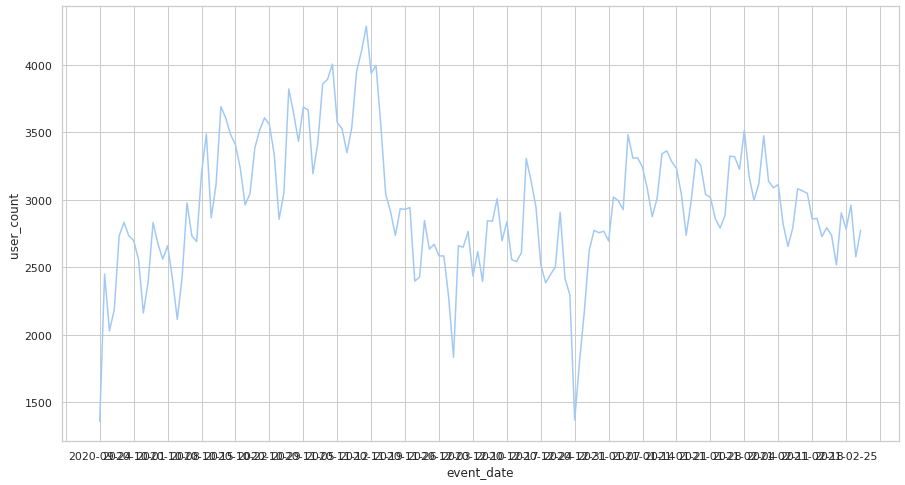

In [9]:
# 그래프 축의 간격을 바꾸자
# 축의 간격을 바꾸기 위해서는 matplotlib ticker를 이용해야한다
# 축의 간격을 몇 배수를 띄울건지 지정한다

import matplotlib.ticker as ticker
sns.set_theme(style="whitegrid", palette="pastel")
g=sns.lineplot(x='event_date',y='user_count',data=dau_data)
g.figure.set_size_inches(15,8)

# x축의 위치를 설정하는 함수
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

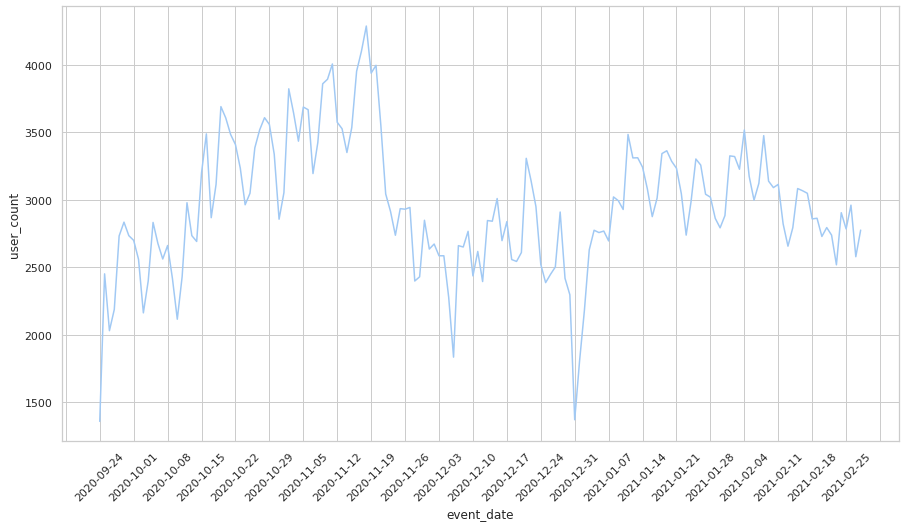

In [10]:
import matplotlib.ticker as ticker
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전시킨다

import matplotlib.ticker as ticker
sns.set_theme(style="whitegrid", palette="pastel")
g=sns.lineplot(x='event_date',y='user_count',data=dau_data)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))

Text(0.5, 1.0, '일자 별 DAU 변화')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

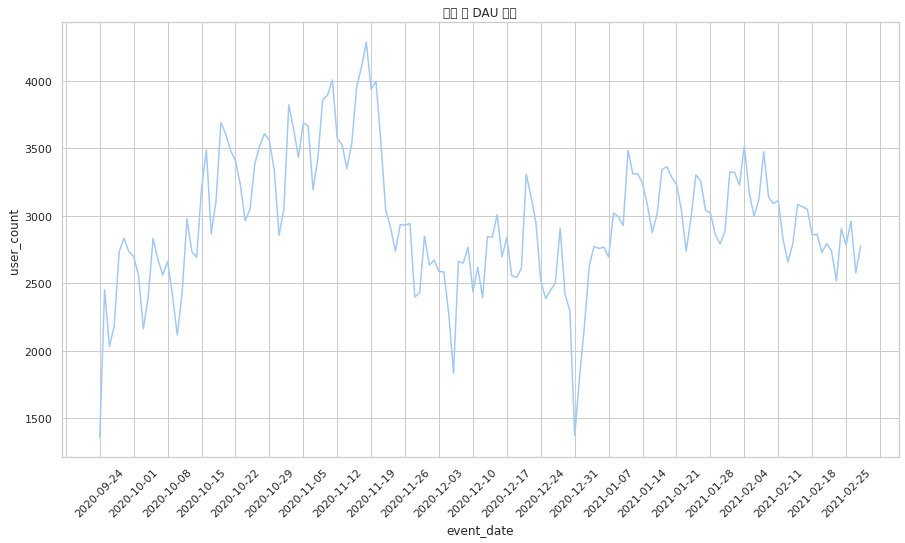

In [11]:
# 마지막으로 라벨을 수정한다
# 한글 폰트가 깨진다. colab이 떠있는 컴퓨터에 한글 폰트를 다운받아 불러온다.

plt.xticks(rotation=45)
sns.set_theme(style="whitegrid", palette="pastel")
g=sns.lineplot(x='event_date',y='user_count',data=dau_data)
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title("일자 별 DAU 변화")

In [12]:
# 폰트 불러오는 방법

# 정보 1. colab 이 띄워진 컴퓨터는 리눅스라는 운영체제가 깔려 있습니다. Not Windows, Mac 
# 정보 2. linux 는 서버 컴퓨터 (회사의 거의 모든 소프트웨어가 떠있는 컴퓨터)로 제일 많이 사용됩니다. 
#    (윈도우와 맥은 개인용 컴퓨터에서 주로 사용됩니다. 개발자 가운데는 그래서 개인용 컴퓨터에 리눅스를 깔아 사용하는 사람들도 있습니다.)
# 정보 3. 운영체제는 GUI (그래픽을 키보드, 마우스로 조작하는 것) 과 Commandline (명령어를 통해 OS를 조작하는 것) 2가지 방법으로 조작이 가능합니다.
# 정보 4. Colab 에서 Command(명령어)를 통해 서버를 조작할 수 있는 방법은 "!"를 앞에 붙여주는 것입니다.
# 정보 5. 리눅스에서 폰트를 다운받는 방법은 다음과 같습니다: https://www.lesstif.com/lpt/linux-font-font-config-93127497.html#:~:text=fc%2Dcache%20%EB%AA%85%EB%A0%B9%EC%96%B4%EB%8A%94%20%EC%8B%9C%EC%8A%A4%ED%85%9C,%EC%BA%90%EC%8B%9C%20%EC%A0%95%EB%B3%B4%EB%A5%BC%20%EA%B0%B1%EC%8B%A0%ED%95%A9%EB%8B%88%EB%8B%A4.

# ! 리눅스 조작 명령어
# 그래서 

!sudo apt-get install -y fonts-nanum #font nanum을 컴퓨터에 다운받는다 # sudo는 관리자 권한을 이용자에게 부여
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf # cache는 작은 공간, 프로그램을 다운 받아놓고 다음에 사용할 때 똑같이 사용가능, 지금은 기존의 cache를 날려주는 명령어

# 명령어 입력후 런타임 재시작을 합니다 런타임 > 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

Text(0, 0.5, '유저수')

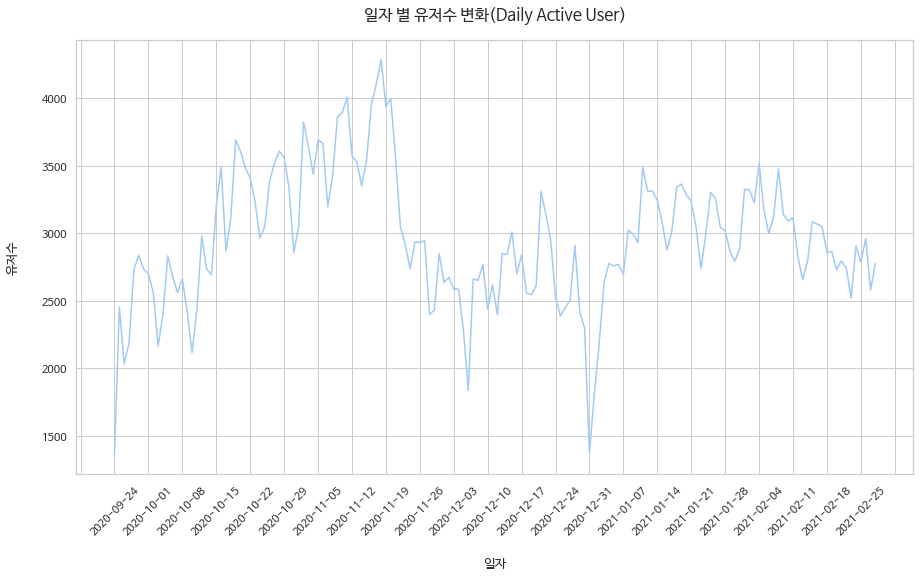

In [14]:
# data 시각화 라이브러리 import 하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
sns.set_theme(style="whitegrid",palette="pastel") # 테마를 설정한다
plt.rc('font',family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X라벨의의 글씨를를 회전시킨다.

g=sns.lineplot(x='event_date',y='user_count',data=dau_data) # line 차트 그래프를 그린다.
g.figure.set_size_inches(15,8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title("일자 별 유저수 변화(Daily Active User)",pad=20, size=16) # pad 그래프와와 제목목 사이의의 간격을을 조정합니다.

g.set_xlabel("일자",labelpad=20,size=13)
g.set_ylabel("유저수",labelpad=20,size=13)